In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
hacendado = pd.read_csv('Products of the choosen Brand.csv')

Limpieza de la columna de Categorias >> Toma en cuenta 'categories_hierarchy, '_keywords', 'pnns_groups_1'

In [6]:
categories = hacendado[['categories_hierarchy', '_keywords', 'pnns_groups_1']]
categories['categories_hierarchy'].fillna('[]', inplace=True)
categories['categories_hierarchy'] = categories['categories_hierarchy'].apply(lambda x: x[1:-1].split(', '))
categories['_keywords'] = categories['_keywords'].apply(lambda x: x[1:-1].split(', '))

In [7]:
new_df = categories.explode('categories_hierarchy')
new_df

,categories_hierarchy,_keywords,pnns_groups_1
0,'en:meats',"['salchichon', 'hacendado', 'pavo', 'fiambre',...",Fish Meat Eggs
0,'en:prepared-meats',"['salchichon', 'hacendado', 'pavo', 'fiambre',...",Fish Meat Eggs
1,'en:beverages',"['sin', 'para', 'beber', 'producto', 'fermenta...",Milk and dairy products
1,'en:dairies',"['sin', 'para', 'beber', 'producto', 'fermenta...",Milk and dairy products
1,'en:fermented-foods',"['sin', 'para', 'beber', 'producto', 'fermenta...",Milk and dairy products
...,...,...,...
5034,'en:candies',"['golosina', 'preparado', 'concentrado', 'frut...",Sugary snacks
5035,'en:snacks',"['dulce', 'base', 'vegano', 'de', 'hacendado',...",Sugary snacks
5035,'en:sweet-snacks',"['dulce', 'base', 'vegano', 'de', 'hacendado',...",Sugary snacks
5035,'en:confectioneries',"['dulce', 'base', 'vegano', 'de', 'hacendado',...",Sugary snacks


In [8]:
new_df[['language','content']] = new_df['categories_hierarchy'].str.split(':',expand=True)
new_df['language'] = new_df['language'].str.replace("'", "")
new_df['content'] = new_df['content'].str.replace("'","")

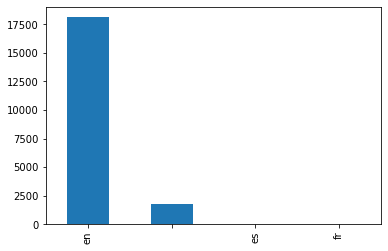

In [9]:
new_df['language'].value_counts().plot.bar();

In [10]:
new_df = new_df.dropna()

In [11]:
new_df["content"] = new_df["content"].str.lower()
new_df['content'] = new_df['content'].str.replace("-", " ")

In [20]:
keywords={'yogurts':'LACTEOS', 'milks':'LACTEOS', 'cream':'LACTEOS','cheeses':'LACTEOS','milk':'LACTEOS', 'cheese':'LACTEOS', 
          'meat':'CARNE','durum':'CARNE','steak':'CARNE','sausage':'CARNE','steaks':'CARNE','sausages':'CARNE',
          'fish':'PESCADO','shrimp':'PESCADO','fishes':'PESCADO','shrimps':'PESCADO',
          'beans':'LEGUMBRES','dried':'LEGUMBRES','seeds':'LEGUMBRES','peppers':'LEGUMBRES', 'nuts':'LEGUMBRES',
          'vegetable':'HORTALIZAS','olives':'HORTALIZAS','soups':'HORTALIZAS','mushrooms':'HORTALIZAS',
          'fruit':'FRUTAS','fruits':'FRUTAS','apple':'FRUTAS', 'orange':'FRUTAS','banana':'FRUTAS',
          'wheat':'CEREALES','rices':'CEREALES','cereal':'CEREALES','cakes':'CEREALES', 'rice':'CEREALES',
          'breads':'CEREALES', 'biscuits':'CEREALES','corn':'CEREALES','pasta':'CEREALES',
          'chocolate':'LIPIDOS', 'chocolates':'LIPIDOS', 'turron':'LIPIDOS', 'chuches':'LIPIDOS',
          'beer':'ALCOHOL','wine':'ALCOHOL','whiskey':'ALCOHOL', 'tomato':'HORTALIZAS','asparagus':'HORTALIZAS',
          'carrots':'HORTALIZAS', 'legumes':'HORTALIZAS', 'chickpeas':'LEGUMBRES','sardines':'PESCADO', 'ham':'CARNE',
          'butters':'LIPIDOS','lentils':'LEGUMBRES','chicken':'CARNE', 'sweet':'LIPIDOS','lemon':'FRUTAS', 
          'vanilla':'LACTEOS', 'crisps':'CEREALES', 'pork':'CARNE', 'jams':'LIPIDOS', 'almonds':'LEGUMBRES', 
          'artichokes':'HORTALIZAS','onions':'HORTALIZAS', 'egg':'CARNE', 'eggs':'CARNE','sugar':'LIPIDOS', 'syrups':'LIPIDOS', 
          'berries':'FRUTAS','fillets':'CARNE','spinachs':'HORTALIZAS','honeys':'LIPIDOS','tunas':'PESCADO', 'oil':'LIPIDOS',
         'dairy':'LACTEOS', 'dairies':'LACTEOS', 'salad':'HORTALIZAS', 'salads':'HORTALIZAS', 'sheep':'CARNE', 'seeds':'LEGUMBRES',
         'sunflower':'LEGUMBRES', 'pumpkin':'HORTALIZAS','popcorn':'LEGUMBRES', 'mint':'HORTALIZAS', 'creams':'LACTEOS',
         'pineapples':'FRUTAS','nectars':'FRUTAS','pates':'CEREALES', 'alcoholic':'ALCOHOL', 'peaches':'FRUTAS', 'lettuces':'HORTALIZAS',
         'cherries':'FRUTAS', 'aceite':'LIPIDOS','beverages':'BEBIDAS', 'coffee':'BEBIDAS', 'tea':'BEBIDAS', 'teas':'BEBIDAS',
         'coffees':'BEBIDAS', 'drinks':'BEBIDAS', 'drink':'BEBIDAS', 'bee':'LIPIDOS', 'bakery':'CEREALES', 'bonito':'PESCADO', 
         'broccoli':'HORTALIZAS'}

In [21]:
cat_index=[]
cat=[]
mega_cat=[]
for i in range(len(new_df)):
    label = new_df['content'].iloc[i]
    for j,k in keywords.items():
            if j in label:
                cat_index.append(i)
                cat.append(label)
                mega_cat.append(k)

In [22]:
df = pd.DataFrame(zip(cat_index, cat, mega_cat), columns=['cat_ID','off cat','mega_cat'])

In [23]:
df.drop_duplicates()

,cat_ID,off cat,mega_cat
0,0,meats,CARNE
1,1,prepared meats,CARNE
2,2,beverages,BEBIDAS
3,3,dairies,LACTEOS
4,5,fermented milk products,LACTEOS
...,...,...,...
16230,18198,non dairy desserts,LACTEOS
16231,18199,chocolate desserts,LIPIDOS
16232,18201,chocolate soy desserts,LIPIDOS
16233,18203,sweet snacks,LIPIDOS


In [24]:
merge = pd.merge(new_df, df, left_on='content', right_on='off cat', how='outer')
merge

,categories_hierarchy,_keywords,pnns_groups_1,language,content,cat_ID,off cat,mega_cat
0,'en:meats',"['salchichon', 'hacendado', 'pavo', 'fiambre',...",Fish Meat Eggs,en,meats,0.0,meats,CARNE
1,'en:meats',"['salchichon', 'hacendado', 'pavo', 'fiambre',...",Fish Meat Eggs,en,meats,59.0,meats,CARNE
2,'en:meats',"['salchichon', 'hacendado', 'pavo', 'fiambre',...",Fish Meat Eggs,en,meats,295.0,meats,CARNE
3,'en:meats',"['salchichon', 'hacendado', 'pavo', 'fiambre',...",Fish Meat Eggs,en,meats,303.0,meats,CARNE
4,'en:meats',"['salchichon', 'hacendado', 'pavo', 'fiambre',...",Fish Meat Eggs,en,meats,311.0,meats,CARNE
...,...,...,...,...,...,...,...,...
3578950,'en:puffed-wholegrain-rice-cakes',"['integral', 'vegetal', 'vegano', 'tortita', '...",Cereals and potatoes,en,puffed wholegrain rice cakes,18002.0,puffed wholegrain rice cakes,CEREALES
3578951,'en:puffed-wholegrain-rice-cakes',"['integral', 'vegetal', 'vegano', 'tortita', '...",Cereals and potatoes,en,puffed wholegrain rice cakes,18002.0,puffed wholegrain rice cakes,CEREALES
3578952,'en:baby-milks',"['bebe', 'hacendado', 'crecimiento', 'leche', ...",unknown,en,baby milks,18058.0,baby milks,LACTEOS
3578953,'en:baby-milks',"['bebe', 'hacendado', 'crecimiento', 'leche', ...",unknown,en,baby milks,18058.0,baby milks,LACTEOS


In [25]:
final = merge[['categories_hierarchy', 'mega_cat', 'pnns_groups_1', 'language', 'content']].drop_duplicates()

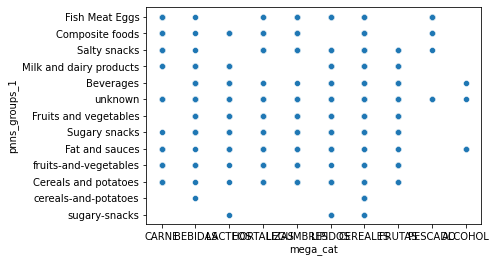

In [26]:
sns.scatterplot(y=final['pnns_groups_1'], x=final['mega_cat'])

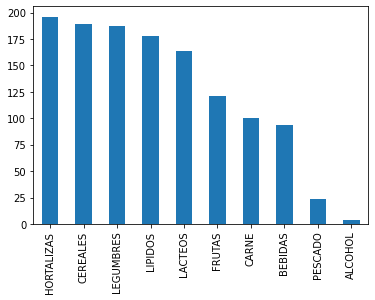

In [28]:
final['mega_cat'].value_counts().plot.bar();

_keyword column

In [30]:
motscles = hacendado[['_keywords']]
motscles['_keywords'].fillna('[]', inplace=True)
motscles['_keywords'] = motscles['_keywords'].apply(lambda x: x[1:-1].split(', '))
motscles = hacendado.explode('_keywords')
motscles = motscles[['_keywords']].drop_duplicates()
motscles.reset_index(inplace=True)
motscles.drop(columns='index', inplace=True)
motscles['_keywords'] = motscles['_keywords'].str.replace("[","")
motscles['_keywords'] = motscles['_keywords'].str.replace("]","")
motscles['_keywords'] = motscles['_keywords'].str.replace(","," ")
motscles

,_keywords
0,'salchichon' 'hacendado' 'pavo' 'fiambre' ...
1,'sin' 'para' 'beber' 'producto' 'fermentad...
2,'crangejo' 'gluten' 'hacendado' 'de' 'ensa...
3,'vegano' 'mondada' 'fruto' 'vegetariano' '...
4,'beverage' 'and' 'hacendado' 'de' 'oliva' ...
...,...
4695,'gluten-free' 'hacendado' 'camaiot' 'loncha'
4696,'hacendado' 'maiz' 'dulce'
4697,'sin' 'chocolate' 'gluten' 'lactosa' 'vege...
4698,'golosina' 'preparado' 'concentrado' 'fruta...


In [ ]:
motscles['_keywords'].str.split(expand=True).stack().value_counts().head(60)

In [ ]:
motscles['_keywords'].str.split(expand=True).stack().unique()

In [ ]:
lista=[]
for word in motscles['_keywords'].str.split(expand=True).stack().unique():
    if len(word) >= 7:
        lista.append(word)

In [ ]:
sorted(lista)

PNNS Groups

In [ ]:
hacendado['pnns_groups_1'].value_counts().plot.bar();

In [ ]:
hacendado['pnns_groups_1'].head(60)

Let's check on Product's level

In [ ]:
hacendado['categories_hierarchy'].fillna('[]', inplace=True)
hacendado['categories_hierarchy'] = hacendado['categories_hierarchy'].apply(lambda x: x[1:-1].split(', '))

In [ ]:
for i in range(len(hacendado)) :
    for word in hacendado['categories_hierarchy'].iloc[i]:
        if word in final['categories_hierarchy']:
            print(word)

A nivel de Productos

In [ ]:
hacendado['categories_hierarchy'].fillna('[]', inplace=True)
hacendado['categories_hierarchy'] = hacendado['categories_hierarchy'].apply(lambda x: x[1:-1].split(', '))

In [ ]:
def last_cat(x):
    return x[-1]

hacendado['last_cat'] = hacendado['categories_hierarchy'].apply(last_cat)